In [42]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

## Question 14

In [32]:
## Import Stock Market Data

## Import advertisting dataset
auto = pd.read_csv('..\..\datasets\Auto 2.csv', index_col='Unnamed: 0')
display(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [33]:
## a) Create a binary variable mpg01 that contains a 1 if mpg contains a value above its median and 0 if mpg contains a value below it's median

auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

display(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [34]:
## b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which features seem most likely to be useful in predictio mpg01

auto.corr()

## Based on the correlation matrix alone, it appears that mpg, cylinders, displacement, horespower, and weight seem the most likely to help predict mpg01

C:\Users\lucas\AppData\Local\Temp\ipykernel_20064\3560219606.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


In [35]:
auto.mpg01.value_counts()

## Market went up ~ 60% of weeks over the time from 1990 to 2010

0    196
1    196
Name: mpg01, dtype: int64

In [50]:
## c) Split the data into a train and test set

X = auto.drop(columns=['mpg01', 'name', 'acceleration', 'year', 'origin'])
y = auto.mpg01

scaler = StandardScaler()
encoder = LabelEncoder()

X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

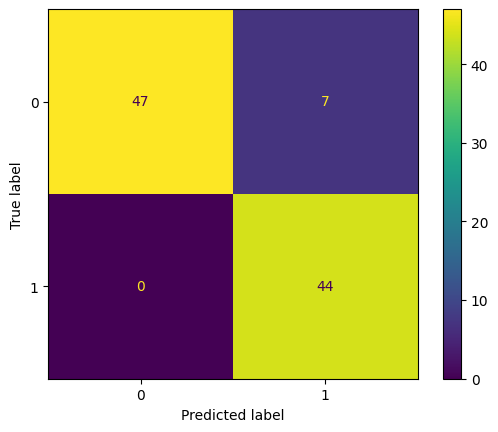

Accuracy: 0.9285714285714286
Recall: 1.0
Precision: 0.8627450980392157


In [51]:
## d) Perform LDA. What is the test Error? 

clf = LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

## LDA performs extremely well on this dataset. Only misclassifying 8 observations

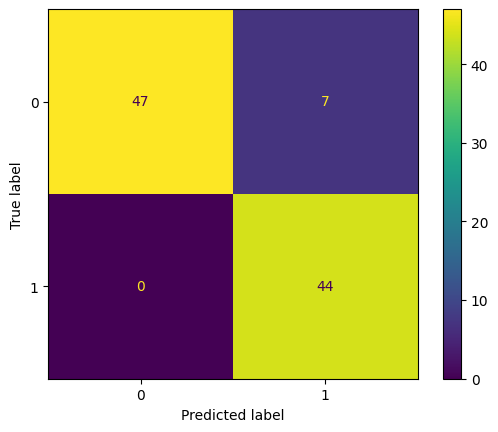

Accuracy: 0.9285714285714286
Recall: 1.0
Precision: 0.8627450980392157


In [52]:
## e) Perform QDA

clf = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

## QDA performs the same as LDA

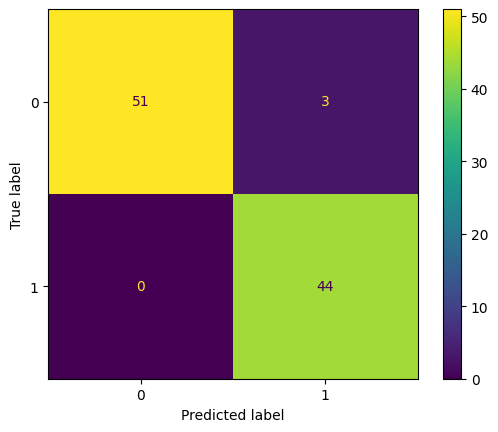

Accuracy: 0.9693877551020408
Recall: 1.0
Precision: 0.9361702127659575


In [53]:
## f) Perform Logistic Regression

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

## Logistic Regression performs the best, only misclassifying 3 observations!

Prior Probs:
 [0.4829932 0.5170068] 

Class Means:
 [[-0.86062284  0.80188101  0.80539814  0.70699954  0.77367676]
 [ 0.86510785 -0.75202201 -0.73258999 -0.66031528 -0.73589697]] 



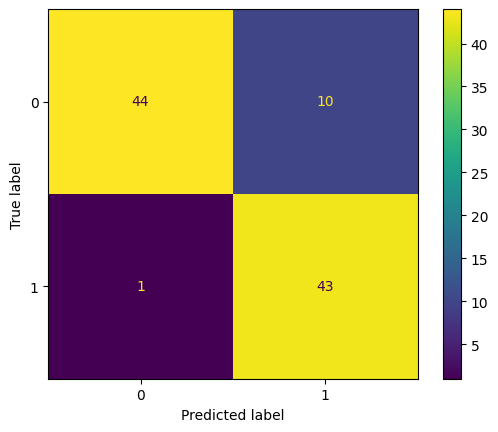

Accuracy: 0.8877551020408163
Recall: 0.9772727272727273
Precision: 0.8113207547169812


In [55]:
## g) Perform Naive Bayes

clf = GaussianNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Prior Probs:\n', clf.class_prior_, '\n')

print('Class Means:\n', clf.theta_, '\n')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

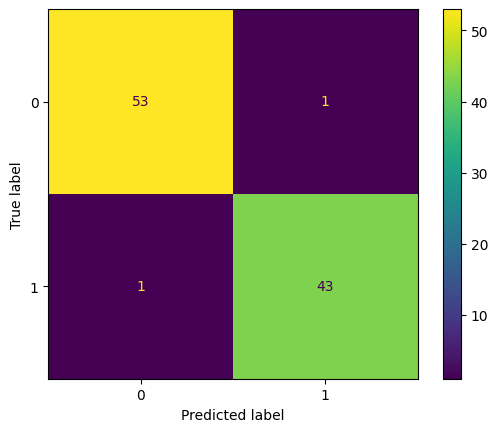

Accuracy:
 0.9795918367346939
Recall: 0.9772727272727273
Precision: 0.9772727272727273


In [63]:
## h) Perform KNN

clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(f'Accuracy:\n', accuracy_score(y_test,y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

## KNN of 2 seems to be the best of the bunch. Although it depends on which type of error is more tolerable.